# Notebook for creating plots of reconstruced variables 


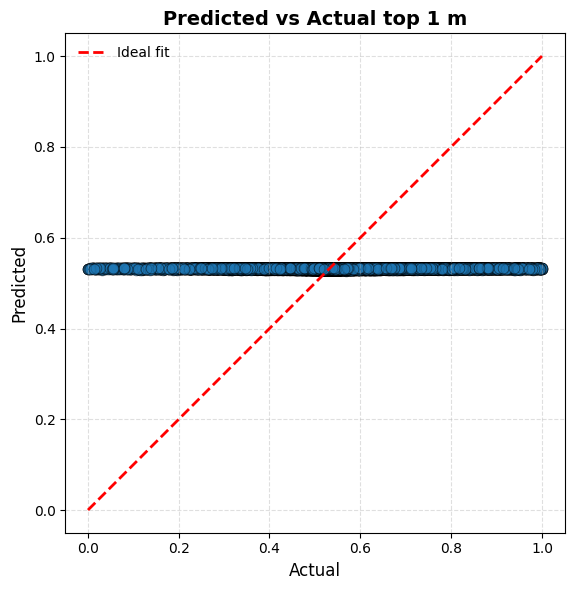

In [1]:
from pathlib  import Path
import h5py
import joblib
import matplotlib.pyplot as plt
import numpy as np

lightlog_path = "../lightning_logs/version_"
output_path = "test_outputs.h5"

version_number = 45
variable = "top 1 m"
variable_number = 3


file_path = Path(f"{lightlog_path}{version_number}" , output_path)

with h5py.File(file_path, "r") as file:
    targets = file["targets"][()]
    predicted = file["predicted"][()]




plt.figure(figsize=(6, 6))
plt.scatter(
    targets[..., 0, variable_number],
    predicted[..., 0,variable_number],
    alpha=0.6,
    edgecolors='k',
    linewidths=0.5,
    s=60,
    c='tab:blue'
)

# Add a diagonal reference line (perfect prediction)
min_val = np.min([targets[..., 0, variable_number], predicted[..., 0, variable_number]])
max_val = np.max([targets[..., 0, variable_number], predicted[..., 0, variable_number]])
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal fit')

# Labels and style
plt.xlabel("Actual", fontsize=12)
plt.ylabel("Predicted", fontsize=12)
plt.title(f"Predicted vs Actual {variable}", fontsize=14, weight='bold')
plt.legend(frameon=False)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.axis('square')

plt.show()



In [2]:
with h5py.File("../data/topquarkreconstruction/processed_data_2/ttbar_preprocessed_test.h5") as file:
    targets = file["targets"][()]

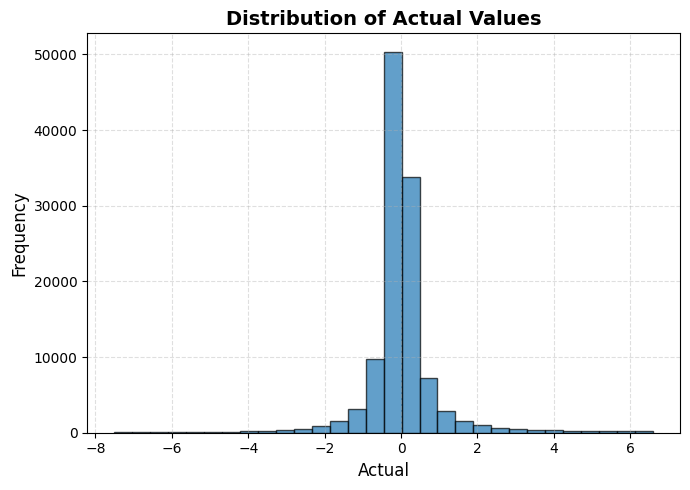

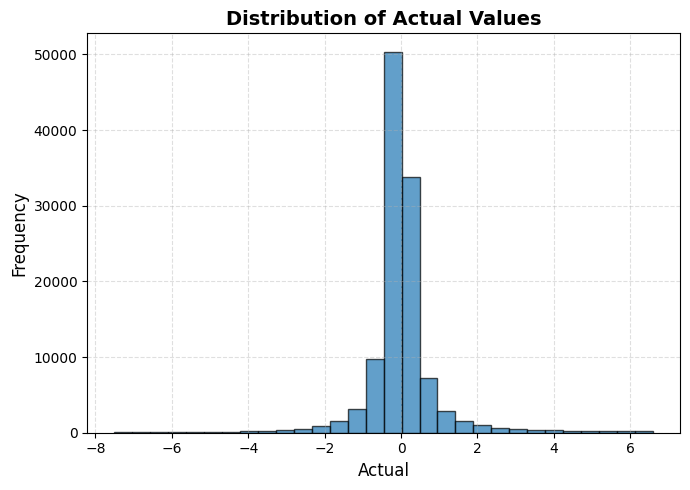

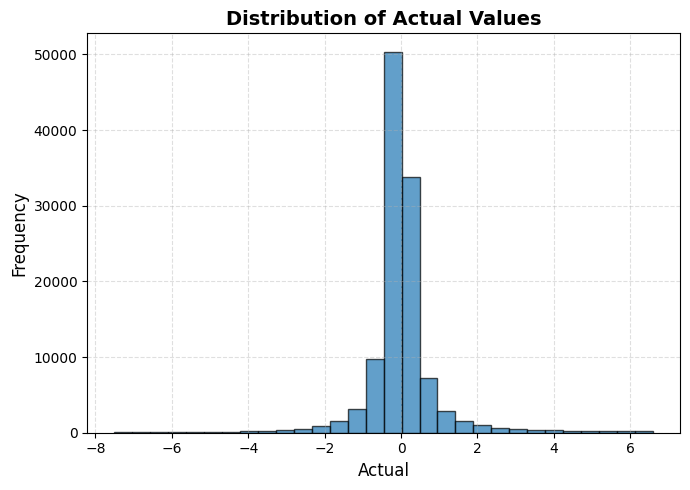

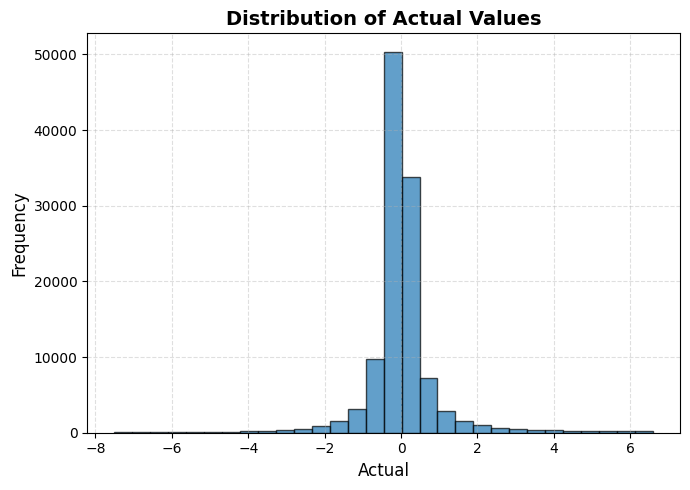

In [ ]:
for i, n in enumerate(
    ["pt", "eta" , "phi", "mass"]
):
    plt.figure(figsize=(7, 5))
    plt.hist(
        targets[..., 0, i],
        bins=30,
        color='tab:blue',
        edgecolor='k',
        alpha=0.7
    )

    plt.title(f"Distribution of {n}", fontsize=14, weight='bold')
    plt.xlabel("Actual", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()

    plt.show()
